<a href="https://colab.research.google.com/github/luisfilipe10/Projeto-Analise-de-Dados-Banco/blob/main/bancoprojeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# parametro encondig para evitar erros de caracteres
dados = pd.read_csv('/content/drive/MyDrive/dados_pandas/ClientesBanco.csv',encoding='latin1')
display(dados.head())

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,768805383,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,769911858,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,709106358,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


In [ ]:
# Exibindo estrutura do Dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Categoria                      10127 non-null  object 
 2   Idade                          10127 non-null  int64  
 3   Sexo                           10127 non-null  object 
 4   Dependentes                    10127 non-null  int64  
 5   Educação                       10127 non-null  object 
 6   Estado Civil                   10127 non-null  object 
 7   Faixa Salarial Anual           10127 non-null  object 
 8   Categoria Cartão               10126 non-null  object 
 9   Meses como Cliente             10127 non-null  int64  
 10  Produtos Contratados           10127 non-null  int64  
 11  Inatividade 12m                10127 non-null  int64  
 12  Contatos 12m                   10127 non-null 

In [ ]:
# exibição de tipos de clientes possíveis
dados.Categoria.unique()

array(['Cliente', 'Cancelado'], dtype=object)

In [ ]:
# Descobrindo as categorias dos Cartões
dados['Categoria Cartão'].unique()

array(['Blue', 'Gold', 'Silver', nan, 'Platinum'], dtype=object)

In [ ]:
# Excluindo valores nulos
dados = dados.dropna()

In [ ]:
# Entendendo sobre a estrutura da tabela
display(dados.describe())

,CLIENTNUM,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,1.012600e+04,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000
mean,7.391700e+08,46.327079,2.346139,35.928995,3.812463,2.341300,2.455264,8631.962088,1162.764369,7469.197719,108.713167,4404.391764,64.861841,66.579995,0.274901
std,3.689769e+07,8.016420,1.298956,7.986593,1.554440,1.010584,1.106267,9089.225428,815.012238,9091.132356,353.912795,3397.157925,23.471594,284.001363,0.275704
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130365e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,358.000000,1324.250000,0.631000,2156.000000,45.000000,0.582000,0.023000
50%,7.179256e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3473.000000,0.736000,3899.500000,67.000000,0.702000,0.175500
75%,7.731328e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.750000,1784.000000,9860.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3397.000000,18484.000000,139.000000,3714.000000,0.999000


In [ ]:
# dados plotados
graph = px.histogram(dados,x='Contatos 12m',color='Categoria')
graph.show()

<Axes: xlabel='Categoria Cartão'>

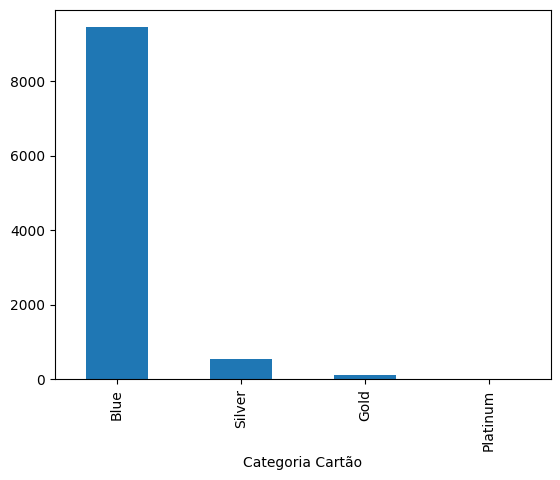

In [ ]:
qts_clientes = dados['Categoria Cartão'].value_counts()
qts_clientes.plot(kind='bar')

In [ ]:
# distribuição clientes / cancelados
total_clientes = dados.Categoria.value_counts().sum()
print(total_clientes)

total_cancelado = dados['Categoria'].value_counts()['Cancelado']
print(total_cancelado)

total_ativo = total_clientes - total_cancelado
print(total_ativo)



10126
1627
8499


In [ ]:
cancelado = (total_cancelado / total_clientes) * 100
print(f'esse ano tivemos queda de {cancelado.round(1)}%')

esse ano tivemos queda de 16.1%


In [ ]:
import plotly.express as px
import pandas as pd

data = {
    'Categoria': ['Ativo', 'Cancelado'],
    'Quantidade': [8499, 1627]
}

df = pd.DataFrame(data)

fig = px.pie(df, names='Categoria', values='Quantidade', title='Proporção de Clientes')
fig.show()
